# Импортируем библиотеки

In [1]:
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Подключения

Инструкция:
- Создайте в Stepik'e [приложение](https://stepik.org/oauth2/applications/) и получите Client id и Client secret.
- Пропишите в следующей ячейки идентификатор вашего курса, Client id и Client secret.
- Последовательно выполните все ячейки в нутбуке.

In [2]:
course_id = 100500
client_id = ''
client_secret = ''

In [3]:
auth = requests.auth.HTTPBasicAuth(client_id, client_secret)
resp = requests.post(
    'https://stepik.org/oauth2/token/',
    data={'grant_type': 'client_credentials'},
    auth=auth)
token = json.loads(resp.text)['access_token']

In [4]:
def make_stepik_api_call_pk(name, pk):
    api_url = 'https://stepik.org/api/{}/{}'.format(name, pk)
    res = json.loads(
        requests.get(api_url, headers={'Authorization': 'Bearer '+ token}).text
    )
    return res

# Загружаем данные

In [5]:
# Загружаем общую информацию о курсе
course = make_stepik_api_call_pk('courses', course_id)['courses'][0]

print(f'''
Количесто студентов: {course['learners_count']}
Количесто уроков: {course['lessons_count']}
Количесто задач: {course['challenges_count']}
Количесто комментариев: {course['discussions_count']}
''')


Количесто студентов: 1425
Количесто уроков: 19
Количесто задач: 72
Количесто комментариев: 60



In [10]:
# Загружаем информацию о модулях
modules_id = course['sections']

modules = []
for module_id in modules_id:
    module = make_stepik_api_call_pk('sections', module_id)['sections'][0]
    modules.append(module)
modules = pd.DataFrame(modules)
modules = modules.rename(columns={
    'id':'module_id',
    'title':'module_title',
    'position':'module_position'})

print(modules.shape)
modules.sample(3).T

(8, 35)


,3,1,7
module_id,124096,124094,304781
course,68260,68260,68260
units,"[317388, 317389]","[312669, 312670]","[312671, 923728, 313247, 873537]"
module_position,4,2,8
discounting_policy,no_discount,no_discount,no_discount
progress,79-124096,79-124094,79-304781
actions,{'test_section': '#'},{'test_section': '#'},{'test_section': '#'}
required_section,None,None,None
required_percent,100,100,100
is_requirement_satisfied,True,True,True


In [11]:
# Загружаем информацию об уроках
units_id = modules['units'].values.sum()

lessons = []
for unit_id in units_id:
    unit = make_stepik_api_call_pk('units', unit_id)['units'][0]
    lesson = make_stepik_api_call_pk('lessons', unit['lesson'])['lessons'][0]
    lesson['module_id'] = unit['section']
    lesson['lesson_position'] = unit['position']
    lessons.append(lesson)
lessons = pd.DataFrame(lessons)
lessons = lessons.rename(columns={
    'id':'lesson_id',
    'title':'lesson_title',
    'viewed_by':'lesson_viewed_by',
    'passed_by':'lesson_passed_by',
    'discussions_count':'lesson_discussions_count'  
})

print(lessons.shape)
lessons.sample(3).T

(19, 43)


,14,13,1
lesson_id,329910,1076196,329366
steps,"[1181674, 4653086, 4652235, 4652234]","[4458239, 4475299, 4475582, 4475308, 4478726]","[1179383, 1181733, 1182780, 1183273, 1183411, ..."
actions,"{'learn_lesson': '#', 'assist_lesson': '#', 'v...","{'learn_lesson': '#', 'assist_lesson': '#', 'v...","{'learn_lesson': '#', 'assist_lesson': '#', 'v..."
progress,76-329910,76-1076196,76-329366
subscriptions,"[31-76-329910, 30-76-329910]","[31-76-1076196, 30-76-1076196]","[31-76-329366, 30-76-329366]"
lesson_viewed_by,43,93,761
lesson_passed_by,2,3,60
time_to_complete,38.0,26.0,20675.0
cover_url,https://ucarecdn.com/24ed5048-f51c-4b82-92ca-9...,https://ucarecdn.com/581c9900-1617-4501-b2cd-1...,https://ucarecdn.com/3f2a79aa-a308-43b5-85ce-4...
is_comments_enabled,True,True,True


In [8]:
# Загружаем информацию о шагах
steps_id = lessons['steps'].values.sum()

steps = []
for step_id in steps_id:
    step = make_stepik_api_call_pk('steps', step_id)['steps'][0]
    steps.append(step)
steps = pd.DataFrame(steps)
steps = steps.rename(columns={
    'id':'step_id',
    'lesson':'lesson_id',
    'position':'step_position',
    'viewed_by':'step_viewed_by',
    'passed_by':'step_passed_by',
    'correct_ratio':'step_correct_ratio',
    'discussions_count':'step_discussions_count'
})

print(steps.shape)
steps.sample(3).T

,48,65,1
step_id,1203273,1181670,4805255
lesson_id,333977,329906,334372
step_position,4,1,2
status,ready,ready,ready
block,"{'name': 'code', 'text': '<h1>Инициализация кл...","{'name': 'text', 'text': '<h1>Случайный лес (р...","{'name': 'text', 'text': '<h1>Код</h1> <p>В к..."
actions,"{'edit_instructions': '#', 'submit': '#', 'com...",{'comment': '#'},{'comment': '#'}
progress,77-1203273,77-1181670,77-4805255
subscriptions,"[31-77-1203273, 30-77-1203273]","[31-77-1181670, 30-77-1181670]","[31-77-4805255, 30-77-4805255]"
instruction,None,None,None
session,None,None,None


In [9]:
# Формируем итоговый датасет
df = modules[['module_id','module_title','module_position']].copy()
cols = [
    'module_id',
    'lesson_id',
    'lesson_title',
    'lesson_position',
    'lesson_viewed_by',
    'lesson_passed_by',
    'lesson_discussions_count',
    'time_to_complete'
]
df = df.merge(lessons[cols], on='module_id')
cols = [
    'lesson_id',
    'step_id',
    'step_position',
    'step_viewed_by',
    'step_passed_by',
    'step_correct_ratio',
    'step_discussions_count'
]
df = df.merge(steps[cols], on='lesson_id')

print(df.shape)
df.sample(5).T

(120, 16)


,52,97,36,44,35
module_id,124096,342757,308529,308529,308529
module_title,Деревья решений,Кластеризация,Метрические алгоритмы,Метрические алгоритмы,Метрические алгоритмы
module_position,4,6,3,3,3
lesson_id,333977,329909,329908,917932,329908
lesson_title,Классификация,Иерархическая агломеративная кластеризация,Метод ближайших соседей (классификация),Метод ближайших соседей (регрессия),Метод ближайших соседей (классификация)
lesson_position,1,2,1,2,1
lesson_viewed_by,237,64,271,105,271
lesson_passed_by,10,5,23,22,23
lesson_discussions_count,18,0,2,0,2
time_to_complete,48998.0,51.0,11308.0,2620.0,11308.0


In [12]:
# Сохраняем датасеты
modules.to_pickle('data/modules.pkl')
lessons.to_pickle('data/lessons.pkl')
steps.to_pickle('data/steps.pkl')
df.to_pickle('data/df.pkl')

# Графики

In [13]:
df = pd.read_pickle('data/df.pkl')

## Типы шагов

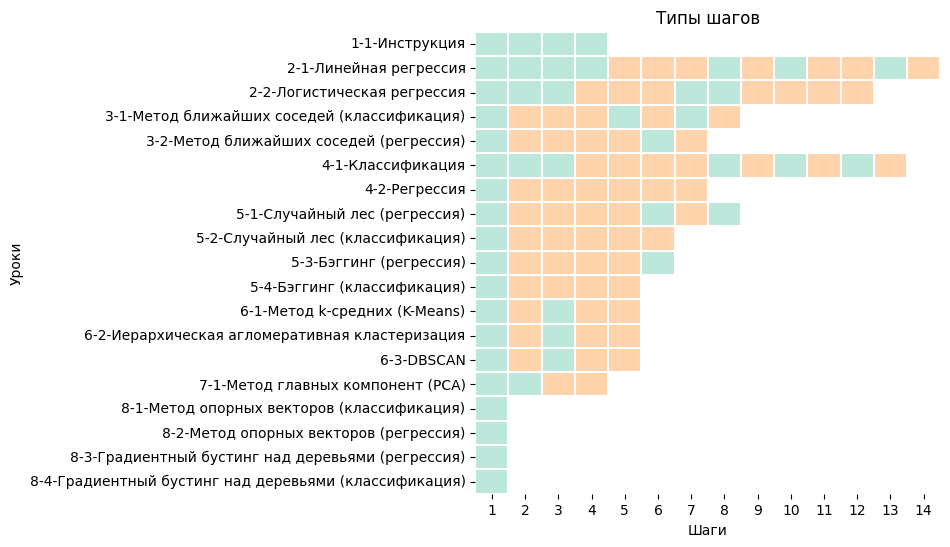

In [14]:
temp = pd.pivot_table(
    df.fillna(0),
    index = ['module_position','lesson_position','lesson_title'], 
    columns = ['step_position'], 
    values = ['step_correct_ratio'], 
    aggfunc = 'max')
temp.columns = [col[1] for col in temp.columns]

mask = pd.pivot_table(
    df, 
    index = ['module_position','lesson_position'], 
    columns = ['step_position'], 
    values = ['step_viewed_by'],
    fill_value = 0,
    aggfunc = 'max')

plt.figure(figsize=(6, 6))
sns.heatmap(
    (temp > 0),
    mask = (mask == 0).values,
    cmap = 'icefire',
    linewidths = 0.1,
    cbar = False
)
plt.xlabel('Шаги')
plt.ylabel('Уроки')
plt.title('Типы шагов');

## Количество просмотров

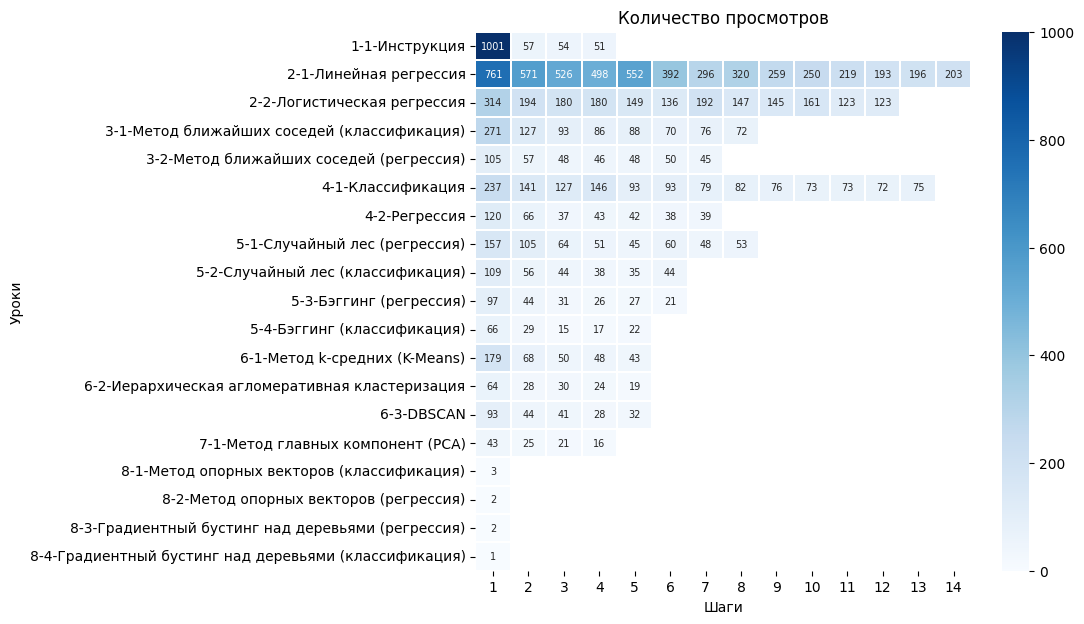

In [15]:
temp = pd.pivot_table(
    df.fillna(0), 
    index = ['module_position','lesson_position','lesson_title'], 
    columns = ['step_position'], 
    values = ['step_viewed_by'], 
    aggfunc = 'max')
temp.columns = [col[1] for col in temp.columns]

plt.figure(figsize=(8, 7))
sns.heatmap(
    temp,
    mask = temp == 0,
    cmap = 'Blues',
    linewidths = 0.1,
    annot = True, annot_kws = {'size': 7},
    vmin=0,
    fmt='g'
)
plt.xlabel('Шаги')
plt.ylabel('Уроки')
plt.title('Количество просмотров');

## Количество студентов решивших задание

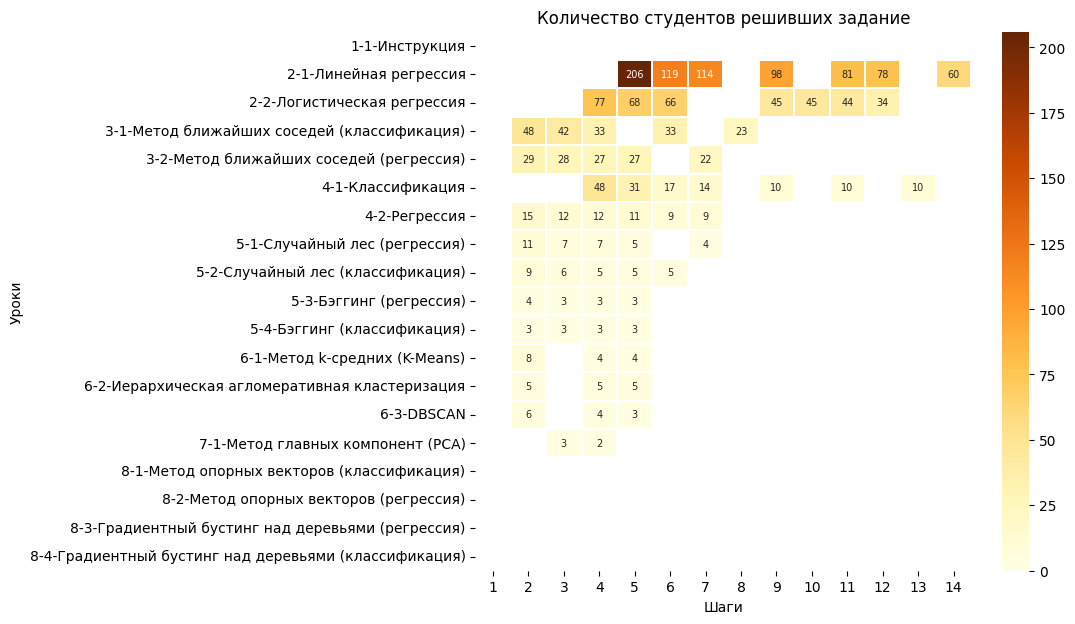

In [16]:
temp = pd.pivot_table(
    df.fillna(0),
    index = ['module_position','lesson_position','lesson_title'], 
    columns = ['step_position'], 
    values = ['step_passed_by'], 
    aggfunc = 'max')
temp.columns = [col[1] for col in temp.columns]

mask = pd.pivot_table(
    df.fillna(0),
    index = ['module_position','lesson_position'], 
    columns = ['step_position'], 
    values = ['step_correct_ratio'], 
    aggfunc = 'max')

plt.figure(figsize=(8, 7))
sns.heatmap(
    temp,
    mask = (mask == 0).values,
    cmap = 'YlOrBr',
    linewidths = 0.1,
    annot = True, annot_kws = {'size': 7},
    vmin = 0,
    fmt = 'g'
)
plt.xlabel('Шаги')
plt.ylabel('Уроки')
plt.title('Количество студентов решивших задание');

## Процент успешных решений

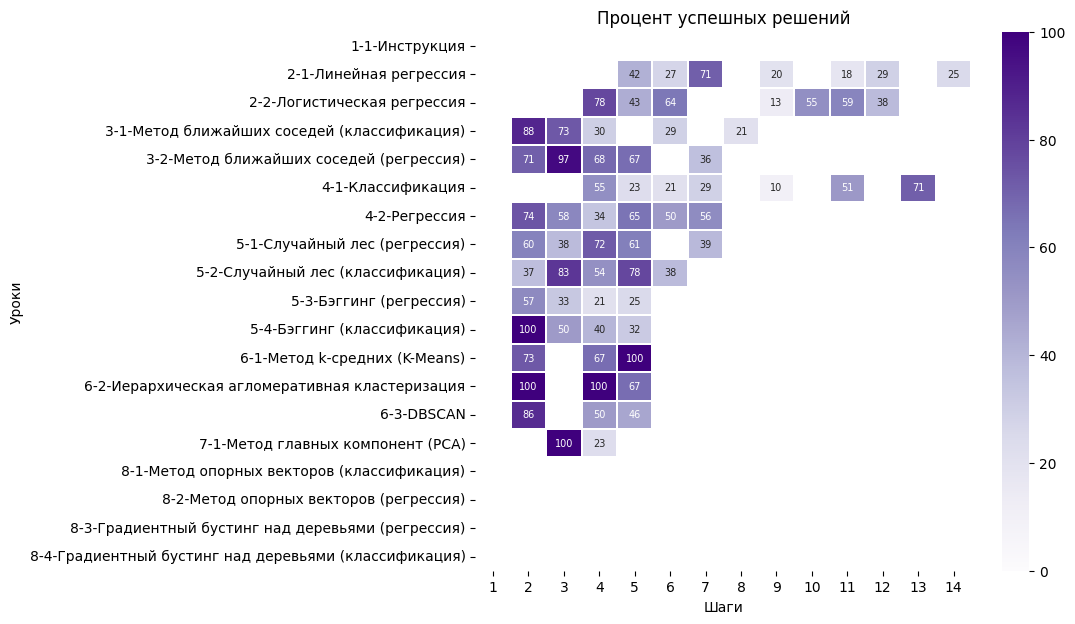

In [17]:
temp = pd.pivot_table(
    df.fillna(0),
    index = ['module_position','lesson_position','lesson_title'], 
    columns = ['step_position'], 
    values = ['step_correct_ratio'], 
    aggfunc = 'max')
temp.columns = [col[1] for col in temp.columns]

plt.figure(figsize=(8, 7))
sns.heatmap(
    (temp*100).round(),
    mask = (temp == 0).values,
    cmap = 'Purples',
    linewidths = 0.1,
    annot = True, annot_kws = {'size': 7},
    vmin = 0, vmax = 100,
    fmt='g'
)
plt.xlabel('Шаги')
plt.ylabel('Уроки')
plt.title('Процент успешных решений');

## Соотношение просмотров к прохождениям уроков

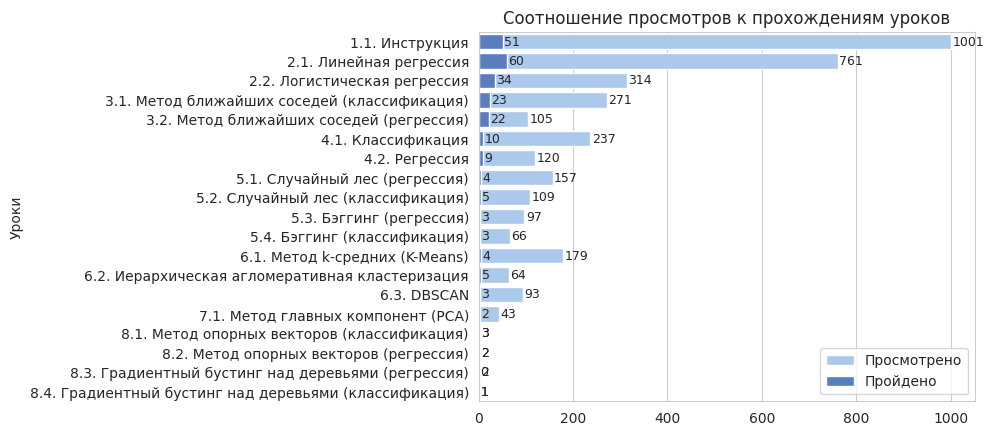

In [20]:
temp = df.groupby(['module_position','lesson_position','lesson_title'], as_index=False)[
    ['lesson_viewed_by','lesson_passed_by']].max()
temp['lesson_title'] = \
    temp['module_position'].astype(str) + '.' + \
    temp['lesson_position'].astype(str) + '. ' + \
    temp['lesson_title'] 

with sns.axes_style(style='whitegrid'):
    sns.set_color_codes('pastel')
    ax = sns.barplot(data=temp, x='lesson_viewed_by', y='lesson_title', label='Просмотрено', color='b')
    ax.bar_label(ax.containers[0], padding=1, fontsize=9) 

    sns.set_color_codes('muted')
    sns.barplot(data=temp, x='lesson_passed_by', y='lesson_title', label='Пройдено', color='b')
    ax.bar_label(ax.containers[1], padding=1, fontsize=9)
    
    plt.legend(loc=4)
    plt.xlabel(None)
    plt.ylabel('Уроки')
    plt.title('Соотношение просмотров к прохождениям уроков');